In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline
from my_plot import set_size
import seaborn as sns
width =  508.0
widthcol = 244
plt.rcParams['font.size']=12
#%matplotlib widget

In [2]:
def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        coefficient=float(coefficient)
        if (coefficient == 1.00):
            return f"$ 10^{{{exponent}}}$"  # Notazione LaTeX
        else: 
            return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [3]:
zh = [5e6,1e6,5e5,1e5,5e4,1e4,1e3]
ampl = [0.1,0.01,0.005]

In [4]:
colors1=sns.color_palette("bright",3) #personal fav 
colors2=sns.color_palette("mako",6) #also nice
colors3 = plt.colormaps['Spectral'].resampled(5)

#Ram's colors, if desired
colors4 = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry

In [5]:
folder = 'outputs'

file_path = os.path.join(folder, f"output_Math2.csv")
op3 = pd.read_csv(file_path, header=None)

data = op3.to_numpy()


In [6]:
data

array([[ 8.01079219e+00, -2.35523933e-03, -5.67948555e-04,
        -1.10177729e-05, -2.18519411e-06, -3.20619045e-07,
        -2.86758516e-07],
       [ 3.05316669e-02, -2.37183684e-05, -5.68744856e-06,
        -1.07379244e-07, -1.89970930e-08, -3.39884010e-10,
        -1.07158726e-12],
       [ 7.56883291e-03, -5.92991479e-06, -1.42188277e-06,
        -2.68449416e-08, -4.74929562e-09, -8.49714743e-11,
        -2.67785794e-13]])

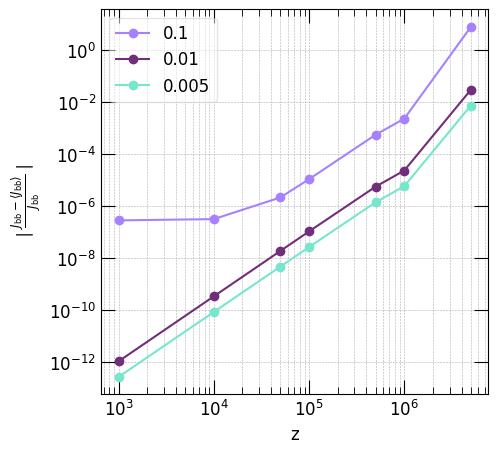

In [10]:
fig, ax= plt.subplots( figsize=(5,5))
colors4 = ["#a682ff","#712f79","#76e7cd","#e55812","#0e7c7b"]

for i in range(3):
    ax.plot(zh, np.abs(data[i]), label= f"{ampl[i]}", color = colors4[i], marker= "o")

#ax.set_xlim([0.005, 2e3])
#ax.set_ylim([1e-13, 1e-4])
ax.set_xscale("log")
ax.set_yscale("log")
plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
#xticks = np.arange(0, 1e4,10)
#yticks = np.logspace(1e-2,1e3,6)

plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
plt.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
plt.legend(loc='best',fancybox=True, framealpha=0.5)
#plt.xticks(xticks)
#plt.yticks(yticks)
ax.set_xlabel("z",fontsize=12)
ax.set_ylabel(r"$\mid \frac{J_{\rm bb}-\langle J_{\rm bb} \rangle}{J_{\rm bb}} \mid$",fontsize=12)

plt.savefig('outputs/p4p/rw.pdf', dpi=300,bbox_inches="tight")
plt.show()